# Доверительные интервалы на основе bootstrap

In [6]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

### Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [7]:
path = 'https://raw.githubusercontent.com/chekhovana/courses/main/machine_learning/4_hypothesis_testing/data/1.5_verizon.txt'
data = pd.read_csv(path, sep='\t')
data.shape

(1687, 2)

In [8]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [9]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

Построим гистограммы времени обслуживания отдельно по двум группам клиентов

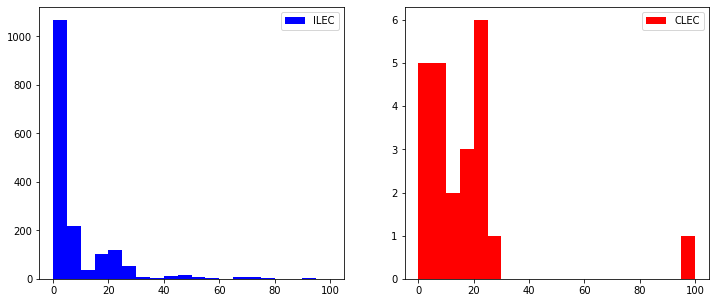

In [10]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [12]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [14]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [27]:
np.random.seed(0)

ilec_median_scores = np.median(get_bootstrap_samples(ilec_time, 1000), axis=1)
clec_median_scores = np.median(get_bootstrap_samples(clec_time, 1000), axis=1)

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


Вывод: внутренним клиентам оборудование ремонтируют быстрее

### Точечная оценка разности медиан

In [ ]:
print("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


### Интервальная оценка разности медиан

In [22]:
delta_median_scores = clec_median_scores - ilec_median_scores
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 2.04975 16.63   ]
